# CovidPredict - Análisis de Datos

## Integrantes:


- Sanchez Cotrado, David Ademir



## Preprocesamiento de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix

Descarga del dataset

In [ ]:
!git clone https://github.com/ajulissa/CovidPredict.git

Cloning into 'CovidPredict'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 101 (delta 46), reused 37 (delta 12), pack-reused 0
Receiving objects: 100% (101/101), 3.04 MiB | 14.02 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
%cd CovidPredict

/content/CovidPredict


In [ ]:
!unzip covidTested_v0083.zip

Archive:  covidTested_v0083.zip
  inflating: covidTested_v0083.csv   


In [ ]:
!ls

CovidPredict-Notebook.ipynb  covidTested_v0083.zip  main.py    README.md  templates
covidTested_v0083.csv	     LogisticRegression.py  model.pkl  static


Lectura del dataset (.csv)

In [ ]:
df0083 = pd.read_csv('./covidTested_v0083.csv')
df0083

<ipython-input-7-52fb16ab9516>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df0083 = pd.read_csv('./covidTested_v0083.csv')


,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


Exploración de datos

In [ ]:
df0083['resultado'].value_counts()

negative    2480403
positive     220975
other         41218
Name: resultado, dtype: int64

In [ ]:
df0083['sesenta_mas'].value_counts()

No     1908553
Yes     286399
Name: sesenta_mas, dtype: int64

In [ ]:
df0083.isnull().sum()

fecha                            0
tos                              0
fiebre                           0
dolor_de_garganta                0
dificultad_para_respirar         0
dolor_de_cabeza                  0
resultado                        0
sesenta_mas                 547644
sexo                         92886
indicaciones                     0
dtype: int64

Eliminación de datos nulos

In [ ]:
data = df0083.dropna()
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [ ]:
data['resultado'].value_counts()

negative    1943172
positive     208726
other         34329
Name: resultado, dtype: int64

Eliminación de datos irrelevantes

In [ ]:
data = data.drop(data[data["resultado"].str.contains("other")].index)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [ ]:
data['resultado'].value_counts()

negative    1943172
positive     208726
Name: resultado, dtype: int64

In [ ]:
data['indicaciones'].value_counts()

Other                     1988259
Contact with confirmed     147809
Abroad                      15830
Name: indicaciones, dtype: int64

Normalización los datos textuales

*En el caso de la columna indicaciones:*

*Other -> 0*

*Abroad -> 0.8*

*Contact with confirmed -> 1*

In [ ]:
data.resultado.replace({"positive": 1, "negative": 0}, inplace = True) #cambio para resultados
data.sesenta_mas.replace({"Yes": 1, "No": 0}, inplace = True) #edad
data.sexo.replace({"male": 1, "female": 0}, inplace = True) #sexo
data.indicaciones.replace({"Contact with confirmed": 1, "Abroad": 0.8, "Other": 0}, inplace = True)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,0,0,1,0.0
1,2020-11-12,0,1,0,0,0,0,0,1,0.0
2,2020-11-12,0,0,0,0,0,0,1,0,0.0
3,2020-11-12,0,0,0,0,0,0,0,1,0.0
4,2020-11-12,0,1,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,1,0,0,1.0
2731640,2020-03-20,0,0,0,0,0,0,0,0,0.0
2731643,2020-03-20,1,0,0,0,0,0,0,1,1.0
2731644,2020-03-20,0,0,0,0,0,0,0,0,0.0


Datos de entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["resultado", "fecha"], axis = 1)
y = data.resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X.head()

,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,sesenta_mas,sexo,indicaciones
0,0,0,0,0,0,0,1,0.0
1,0,1,0,0,0,0,1,0.0
2,0,0,0,0,0,1,0,0.0
3,0,0,0,0,0,0,1,0.0
4,0,1,0,0,0,0,1,1.0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: resultado, dtype: int64

In [ ]:
y_train.value_counts()

0    1457611
1     156312
Name: resultado, dtype: int64

Sobremuestreo de datos de entrenamiento (en este caso para los resultados positivos)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    1457611
1    1457611
Name: resultado, dtype: int64

## Clase LogisticRegression para el entrenamiento y predicción

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.005, gamma=0.9, n_iters=500):
        self.lr = learning_rate
        self.gamma = gamma
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.e_h = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        v_w = np.zeros(n_features)
        v_b = 0
        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = np.dot(X.T, (y_predicted - y))
            db = np.sum(y_predicted - y)

            # momentum
            v_w = self.gamma * v_w + self.lr * dw
            v_b = self.gamma * v_b + self.lr * db

            # update parameters
            self.weights -= v_w
            self.bias -= v_b
            self.e_h.append(self.error(X, y))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)

        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        # y_predicted = self._sigmoid(linear_model)
        return self._sigmoid(linear_model)

    def _sigmoid(self, x):
      return 1 / (1 + np.exp(-x + 1e-15))

    def error(self, X, y):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        loss = -1 / len(y) * np.sum(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
        return loss


### Función para obtener la precisión

In [ ]:
# def accuracy(y_true, y_pred):
#         accuracy = np.sum(y_true == y_pred) / len(y_true)
#         return accuracy

## Entrenamiento

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
modelo_lr = LogisticRegression(learning_rate=0.001, gamma=0.9, n_iters=20)
# modelo_lr = LogisticRegression(random_state=0, solver='liblinear')
# modelo_lr.fit(X_train, y_train)
modelo_lr.fit(X_train, y_train)

<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))


In [ ]:
print("Pesos:", modelo_lr.weights)
print("Bias:", modelo_lr.bias)

Pesos: [ 543.93055108 1776.23087786 1518.56072291  686.09094835 2303.62005912
 -474.31947286  221.19178397 2527.15878972]
Bias: -727.2906463021408


## Validación

In [ ]:
# predictions = regressor.predict(X_test)
predictions = modelo_lr.predict(X_test)

<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))


### Precisión

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
# print("LR classification accuracy:", accuracy(y_test, predictions))
print("LR classification accuracy:", accuracy_score(y_test, predictions))

LR classification accuracy: 0.9192806357172731


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    485561
           1       0.58      0.64      0.61     52414

    accuracy                           0.92    537975
   macro avg       0.77      0.79      0.78    537975
weighted avg       0.92      0.92      0.92    537975



### Parámetros: Pesos y Bias

In [ ]:
print("Pesos:", modelo_lr.weights)
print("Bias:", modelo_lr.bias)
# print(pd.DataFrame({"Predictor": X.columns, "coefficient": modelo_lr.coef_[0]}))

Pesos: [ 543.93055108 1776.23087786 1518.56072291  686.09094835 2303.62005912
 -474.31947286  221.19178397 2527.15878972]
Bias: -727.2906463021408


### Matriz de confusión

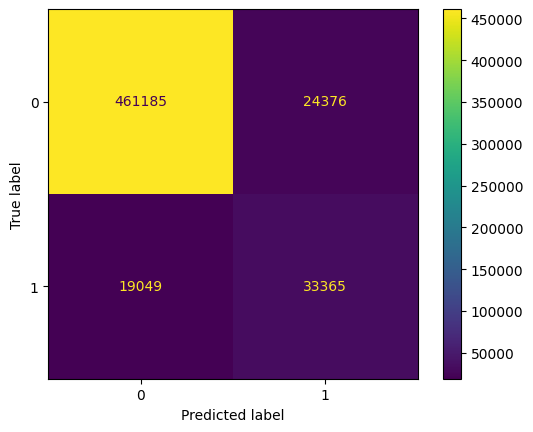

In [ ]:
matriz = confusion_matrix(y_test, predictions)

disp  = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
# plt.tight_layout()

Elección de hiperparámetros

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
gammas = [0.9, 0.95, 0.99]
n_iters_values = [20, 50, 100]

best_accuracy = 0
best_model = None

# Bucle para probar diferentes combinaciones de hiperparámetros
for lr in learning_rates:
    for gamma in gammas:
        for n_iters in n_iters_values:
            # Crear y entrenar el modelo
            modelo_lr = LogisticRegression(learning_rate=lr, gamma=gamma, n_iters=n_iters)
            modelo_lr.fit(X_train, y_train)

            # Realizar predicciones en el conjunto de prueba
            y_pred = modelo_lr.predict(X_test)

            # Calcular la precisión y verificar si es mejor que el mejor modelo hasta ahora
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = modelo_lr

# Imprimir los mejores hiperparámetros y la precisión del mejor modelo
print("Mejores hiperparámetros:")
print(f"Learning Rate: {best_model.lr}")
print(f"Gamma: {best_model.gamma}")
print(f"N_iters: {best_model.n_iters}")
print(f"Accuracy en conjunto de prueba: {best_accuracy}")


<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x + 1e-15))
<ipython-input-23-04c88691df55>:53: RuntimeWarning: over

Mejores hiperparámetros:
Learning Rate: 0.1
Gamma: 0.95
N_iters: 100
Accuracy en conjunto de prueba: 0.9209684464891491


In [ ]:
# puntuaciones = []

# umbrales = np.linspace(0, 1, 101)

# for t in umbrales: #B
#     tp = ((y_pred >= t) & (y_test == 1)).sum()
#     fp = ((y_pred >= t) & (y_test == 0)).sum()
#     fn = ((y_pred < t) & (y_test == 1)).sum()
#     tn = ((y_pred < t) & (y_test == 0)).sum()
#     puntuaciones.append((t, tp, fp, fn, tn))

# df_puntuaciones = pd.DataFrame(puntuaciones)
# df_puntuaciones.columns = ['umbral', 'tp', 'fp', 'fn', 'tn']

# df_puntuaciones['exhaustividad'] = df_puntuaciones.tp / (df_puntuaciones.tp + df_puntuaciones.fn)
# df_puntuaciones['precision'] = df_puntuaciones.tp / (df_puntuaciones.tp + df_puntuaciones.fp)

In [ ]:
# plt.figure(figsize=(6, 4))

# plt.plot(df_puntuaciones.umbral, df_puntuaciones.exhaustividad, color='black', linestyle='solid', label='exhaustividad')
# plt.plot(df_puntuaciones.umbral, df_puntuaciones.precision, color='black', linestyle='dashed', label='precision')
# plt.legend()

# plt.xticks(np.linspace(0, 1, 11))
# plt.yticks(np.linspace(0, 1, 11))

# plt.xlabel('Umbrales')
# plt.title('Exhaustividad y precision')

# plt.show()

In [ ]:
# y_pred2 = []
# for m in y_pred:
#   if m > 0.74:
#     y_pred2.append(1)
#   else:
#     y_pred2.append(0)

In [ ]:
# from sklearn.metrics import roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
# print("LR classification accuracy:", accuracy_score(y_test, y_pred2))

LR classification accuracy: 0.9194646591384358


In [ ]:
# print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    485557
           1       0.58      0.64      0.61     52418

    accuracy                           0.92    537975
   macro avg       0.77      0.79      0.78    537975
weighted avg       0.92      0.92      0.92    537975



### Error por iteración

In [ ]:
# print(regressor.e_h)

In [ ]:
# import numpy as np
# from matplotlib import pyplot as plt
# from matplotlib import animation

# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 20), ylim=(100000, 1000000))
# line, = ax.plot([], [], lw=2)

# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

# # animation function.  This is called sequentially
# def animate(i):
#     x = np.linspace(1, 20, num=20)
#     y = regressor.e_h
#     line.set_data(x[:int(i/10)], y[:int(i/10)])
#     return line,

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=20, blit=True)
# #rc('animation', html='jshtml')
# anim

## Exportación del modelo

In [ ]:
# import pickle

# # guardamos el modelo para ser usado en la aplicación
# filename = 'model.pkl'
# pickle.dump(regressor, open(filename, 'wb'))

## Importación del modelo

In [ ]:
# model = pickle.load(open('model.pkl', 'rb'))

Comparación del modelo importado y la validación

In [ ]:
# y_predict = model.predict(X_test)
# print(y_predict[0:50])

[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0]


<ipython-input-18-e77bbc151751>:47: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
# predictions[0:50]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0])

In [ ]:
# matriz_prueba = confusion_matrix(y_test, y_predict)

# disp  = ConfusionMatrixDisplay(confusion_matrix=matriz_prueba)
# disp.plot()
# # plt.tight_layout()
# # plot_confusion_matrix(conf_mat=matriz_prueba, figsize=(5,5), show_normed=False, cmap='copper_r')
# # plt.tight_layout()